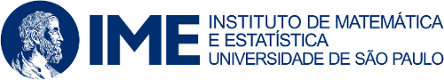

# **MAP2220 - Fundamentos de Análise Numérica**
---
##*Trabalho Computacional 2 - Integração Numérica e Aplicações*
---
### Aluno: Milton Leal Neto - NUSP: 8973974



Este trabalho consiste na implementação, análise e aplicação de alguns algoritmos de Integração Numérica

**ROTEIRO DO TRABALHO**

**a)** Construção de função em Python que implemente o método de Simpson composto de acordo com o Algoritmo 4.1 do texto Burden & Faires.

**b)** Descrição de alguma função da biblioteca Python, que implemente a quadratura de Gauss apresentada no Capítulo 4.7.

**c)** Elaboração de testes que comprovem, de modo didático, o bom funcionamento das funções dos
itens a) e b). 

**d)** Escolha, resolução e análise de um problema prático de aplicação de integração numérica,
utilizando as funções definidas nos itens a) e b).

In [70]:
import numpy as np
from scipy import integrate

## a) **Regra de Simpson Composta**

O algoritmo 4.1 de integração numérica descrito no livro *Numerical Analysis*, de Burden e Faires, denominado "Composite Simpson's Rule", é o algoritmo de quadratura mais frequentemente usado. 

Ele utiliza a regra de Simpson composta em $n$ subintervalos, onde $n$ é um inteiro par, e tem um termo de erro da ordem de $O(h^4)$, que à primeira vista pode parecer pior que o termo de erro da regra padrão de Simpson, que é da ordem de $O(h^5)$. Contudo, o método composto nos permite reduzir consideravelmente o tamanho do subintervalo $h$, dado pela fórmula $h = \frac{(b-a)}{n}$, ao aumentarmos o número de subintervalos. Enquanto isso, o tamanho do intervalo $h$ no método padrão, dado por $h = \frac{(b-a)}{2}$, não pode ser diminuído e não contribui para a melhora da aproximação do valor da integral. 

In [71]:
def composite_simpson(f, a: float, b: float, n: int) -> float:
    """Calcula aproximação de uma integral definida no intervalo [a,b] 
    Retorna o valor aproximado da integral. 

    Args:
        f (function): função a ser integrada
        a (float): extremo inferior de integração
        b (float): extremo superior de integração
        n (int):

    Return:
        float: valor aproximado da integral definida
    """

    h = (b-a)/n # define tamanho do intervalo h

    XI0 = f(a) + f(b) # calcula a função nos extremos do intervalo de integração
    XI1 = 0 # inicia a soma dos termos ímpares do intervalo
    XI2 = 0 # inicia a soma dos termos pares do intervalo

    for i in range(1,n):
        x = a + i*h # incrementa o ponto x
        if i%2 == 0: 
            XI2 += f(x) # se par, soma o valor da função na soma par
        else:
            XI1 += f(x)# se ímpar, soma o valor da função na soma ímpar

    XI = (h/3)*(XI0 + 2*XI2 + 4*XI1) # fórmula do Simpson composto

    return XI    

## b) **Quadratura de Gauss**

Foi escolhida a função *fixed_quad* do módulo *integrate* da biblioteca *Scipy* do *Python*.

Esta função computa uma integral definida usando a quadratura Gaussiana de ordem fixa $n$, sendo o valor default de $n=5$.

Uma das diferenças mais importantes da quadratura de Gausse está relacionada com o fato dela não utilizar pontos equiespaçados, em contraposto ao método de Simpson que utiliza pontos equiespaçados.

A quadratura de Gauss utiliza as raízes dos polinômios ortogonais de *Legendre* para determinar os coeficientes dos polinômios interpoladores usados para o cálculo da aproximação. 

Abaixo, mostramos o código fonte da função obtido neste link [aqui](https://github.com/scipy/scipy/blob/v1.7.1/scipy/integrate/_quadrature.py#L82-L150). Decidimos omitir a docstring da função para não poluir a apresentação.  

In [72]:
def fixed_quad(func, a, b, args=(), n=5):

    # Utiliza função que armazena as raízes dos polinômios de Legendre
    x, w = _cached_roots_legendre(n) 

    x = np.real(x) # Retorna a parte real de um número complexo

    # Consistência para os casos de integrais impróprias
    if np.isinf(a) or np.isinf(b):
        raise ValueError("Gaussian quadrature is only available for "
                         "finite limits.")

    # transforma um intervalo qualquer no intervalo de integração [-1,1]
    y = (b-a)*(x+1)/2.0 + a

    # calcula a aproximação com base nos coeficientes dos polinômios de Legendre
    # integral de -1 até 1 = sum(i = 1 até n) de c_i*f(x_i)
    return (b-a)/2.0 * np.sum(w*func(y, *args), axis=-1), None

## c) **Testes**

Abaixo, mostramos alguns testes das funções dos itens **a)** e **b)**.

## Exemplo 1:

$\int_{0}^{4} e^x \,dx$

In [73]:
# Definindo as variáveis

f = lambda x: np.e**x # função a ser integrada
a = 0 # extremo inferior de integração
b = 4 # extremo superior de integração
n = 100 # número de subintervalos para o método Simpson Composto

### Resultado do método Simpson Composto

In [74]:
simpson = composite_simpson(f,a,b,n)
simpson

53.598150795283864

### Resultado da função *fixed_quad* do *Scipy*

In [75]:
func_scipy = integrate.fixed_quad(f,a,b)[0]
func_scipy

53.59813675734762

### Resultado analítico

In [76]:
analitico = np.e**4 - np.e**0
analitico

53.59815003314423

### Erro absoluto do método de Simpson

In [77]:
abs(analitico - simpson)

7.621396349577481e-07

### Erro absoluto do *fixed_quad* do *Scipy*

In [78]:
abs(analitico - func_scipy)

1.3275796611367241e-05

## Exemplo 2:

$\int_{\frac{\pi}{3}}^{\pi} cos^2(x) \,dx$

In [79]:
# Definindo as variáveis

f = lambda x: np.cos(x)**2 # função a ser integrada
a = np.pi/3 # extremo inferior de integração
b = np.pi # extremo superior de integração
n = 10 # número de subintervalos para o método Simpson Composto

### Resultado do método Simpson Composto

In [80]:
simpson = composite_simpson(f,a,b,n)
simpson

0.8306533823548607

### Resultado da função *fixed_quad* do *Scipy*

In [81]:
func_scipy = integrate.fixed_quad(f,a,b)[0]
func_scipy

0.8306908866039934

### Resultado analítico

In [82]:
analitico = (8*np.pi - 3*np.sqrt(3))/24
analitico

0.830691200250488

### Erro absoluto do método de Simpson

In [83]:
abs(analitico - simpson)

3.78178956272901e-05

### Erro absoluto do *fixed_quad* do *Scipy*

In [84]:
abs(analitico - func_scipy)

3.1364649466514294e-07

## Exemplo 3:

$\int_{2}^{3} x^3 \,dx$

In [85]:
# Definindo as variáveis

f = lambda x: x**3 # função a ser integrada
a = 2 # extremo inferior de integração
b = 3 # extremo superior de integração
n = 100 # número de subintervalos para o método Simpson Composto

### Resultado do método Simpson Composto

In [86]:
simpson = composite_simpson(f,a,b,n)
simpson

16.249999999999996

### Resultado da função *fixed_quad* do *Scipy*

In [87]:
func_scipy = integrate.fixed_quad(f,a,b)[0]
func_scipy

16.25

### Resultado analítico

In [88]:
analitico = (3**4)/4 - (2**4)/4
analitico

16.25

### Erro absoluto do método de Simpson

In [89]:
abs(analitico - simpson)

3.552713678800501e-15

### Erro absoluto do *fixed_quad* do *Scipy*

In [90]:
abs(analitico - func_scipy)

0.0

## Análise Geral dos Resultados

Os resultados mostram que tanto o método Composto de Simpson quanto a Quadratura de Gauss são excelentes métodos de integração numérica e conseguiram aproximar muito bem as integrais. 

No **exemplo 1**, devido ao número de subintervalos escolhido ($n = 10$), o algoritmo de Simpson composto obteve uma aproximação ligeiramente inferior ao algoritmo da quadratura de Gauss biblioteca *Scipy*. 

No **exemplo 2**, com um número muito maior de subintervalos escolhido ($n = 100$), o algoritmo de Simpson composto obteve uma aproximação ligeiramente melhor que o algoritmo da biblioteca *Scipy*. 

No **exemplo 3**, contudo, as performances dos dois métodos podem ser consideradas idênticas a menos dos erros de arrendodamento inerentes à máquina. 

## d) **Aplicações**

Vamos desenvolver abaixo duas aplicações. Na primeira, usaremos as funções do método de Simpson Composto e a *fixed_quad* do *Scipy*. Em seguida, apresentamos uma aplicação que requer uma pequena modificação na função do método de Simpson composto devido ao fato do problema ser baseado em uma tabela de pontos amostrados e não possuir uma função $f(x)$ explícita.  

## 1) Cálculo de Probabilidades - A Curva Normal

Sabemos dos cursos de estatística que a função densidade da distribuição normal univariada com média $\mu =0$ e desvio padrão $\sigma$ é dada pela seguinte expressão:    


$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-({\frac{1}{2}})(\frac{x}{\sigma})^2}$$

Também sabemos que a probabilidade de um valor aleatoriamente escolhido pertencer ao intervalo $[a,b]$ é dada por $\int_{a}^{b} f(x) \,dx$.

Vamos abaixo calcular essas probabilidades para 1, 2 e 3 desvios padrões, no caso em que $σ=1$ e $\mu=0$, ou seja, a curva Normal Padrão.\

## 1.1) $[-σ,σ]$

In [91]:
# Definindo as variáveis
f = lambda x: np.e**(-x**2/2)/np.sqrt(2*np.pi)
a = -1
b = 1
n = 100

### Resultado do método Simpson Composto

In [92]:
simpson = composite_simpson(f,a,b,n)
simpson

0.6826894929975492

### Resultado da função *fixed_quad* do *Scipy*

In [93]:
func_scipy = integrate.fixed_quad(f,a,b)[0]
func_scipy

0.6826897353882191

Vamos comparar com uma implementação do módulo *stats* do *Scipy*. 

In [94]:
import scipy.stats

### Resultado da função *stats* do *Scipy*

In [95]:
stats_scipy = scipy.stats.norm(0, 1).cdf(1) - scipy.stats.norm(0,1).cdf(-1)
stats_scipy

0.6826894921370859

### Erro absoluto do método de Simpson

In [96]:
abs(simpson - stats_scipy)

8.604633672248951e-10

### Erro absoluto do *fixed_quad* do *Scipy*

In [97]:
abs(func_scipy - stats_scipy)

2.4325113323619973e-07

## *1.2*) $[-2σ,2σ]$

In [98]:
# Definindo as variáveis
f = lambda x: np.e**(-x**2/2)/np.sqrt(2*np.pi)
a = -2
b = 2
n = 100

### Resultado do método Simpson Composto

In [99]:
simpson = composite_simpson(f,a,b,n)
simpson

0.954499733026886

### Resultado da função *fixed_quad* do *Scipy*

In [100]:
func_scipy = integrate.fixed_quad(f,a,b)[0]
func_scipy

0.9547606259052618

### Resultado da função *stats* do *Scipy*

In [101]:
stats_scipy = scipy.stats.norm(0, 1).cdf(2) - scipy.stats.norm(0,1).cdf(-2)
stats_scipy

0.9544997361036416

### Erro absoluto do método de Simpson

In [102]:
abs(simpson - stats_scipy)

3.0767556280508757e-09

### Erro absoluto do *fixed_quad* do *Scipy*

In [103]:
abs(func_scipy - stats_scipy)

0.00026088980162020103

Como não obtivemos uma aproximação tão boa usando a Quadratura de Gauss, vamos aumentar a ordem da quadratura de $n=5$ para $n=10$ e repetir o experimento. 

In [104]:
func_scipy = integrate.fixed_quad(f,a,b, n = 10)[0]
func_scipy

0.954499735843967

### Erro absoluto do *fixed_quad* do *Scipy* ajustado

In [105]:
abs(func_scipy - stats_scipy)

2.5967461514397883e-10

## *1.3*) $[-3σ,3σ]$

In [106]:
# Definindo as variáveis
f = lambda x: np.e**(-x**2/2)/np.sqrt(2*np.pi)
a = -3
b = 3
n = 100

### Resultado do método Simpson Composto

In [107]:
simpson = composite_simpson(f,a,b,n)
simpson

0.9973001924543531

### Resultado da função *fixed_quad* do *Scipy*

In [108]:
func_scipy = integrate.fixed_quad(f,a,b)[0]
func_scipy

1.005695397816377

### Resultado da função *stats* do *Scipy*

In [109]:
stats_scipy = scipy.stats.norm(0, 1).cdf(3) - scipy.stats.norm(0,1).cdf(-3)
stats_scipy

0.9973002039367398

### Erro absoluto do método de Simpson

In [110]:
abs(simpson - stats_scipy)

1.1482386708117076e-08

### Erro absoluto do *fixed_quad* do *Scipy*

In [111]:
abs(func_scipy - stats_scipy)

0.008395193879637164

Note que o resultado da aproximação de Gauss é um absurdo, pois sabemos que a integral da $f(x)$ em toda a reta real é igual a 1. Em outras palavras, não podemos ter uma probabilidade superior a 1. Como não obtivemos uma aproximação tão boa usando a Quadratura de Gauss, vamos aumentar a ordem da quadratura de $n=5$ para $n=10$ e repetir o experimento. 

In [112]:
func_scipy = integrate.fixed_quad(f,a,b, n = 10)[0]
func_scipy

0.997299774399957

### Erro absoluto do *fixed_quad* do *Scipy* ajustado

In [113]:
abs(func_scipy - stats_scipy)

4.295367828088814e-07

## Análise Geral dos Resultados

Os resultados mostram que tanto o método Composto de Simpson obteve excelentes resultados no cálculo das probabilidade. Contudo, a Quadratura de Gauss precisou ser ter a sua ordem ajustada para retornar valores aproximados considerados adequados. 

## 2) Simulando características térmicas de discos de freio

O problema abaixo compreende o exercício 24 da seção 4.4 do livro de Burden & Faires. 

Queremos simular as características térmicas de freios a disco, como este da figura abaixo:

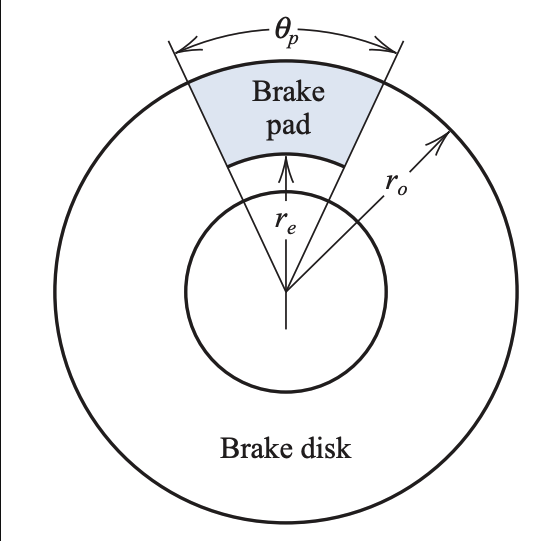

    

Os cientistas D. A. Secrist e R. W. Hornbeck precisaram aproximar numericamente a "temperatura média da área de revestimento", T, da pastilha de freio a partir da seguinte equação:    

$$T = \frac{\int_{r_e}^{r_0}T(r)rθ_p \,dr}{\int_{r_e}^{r_0}rθ_p \,dr}, $$

onde $r_e$ representa o raio no qual o contato do começa, $r_0$ representa o raio externo do contato da pastilha de freio, $θ_p$ representa o ângulo subtendido pelas pastilhas de freio naquele setor, e $T(r)$ é a
temperatura em cada ponto do disco, obtida numericamente a partir da análise da equação de calor. Supondo que $r_e = 0,308$ pés, $r_0 = 0,478$ pés e $θ_p = 0,7051$ radianos e dadas as temperaturas fornecidas na tabela abaixo, queremos aproximar o valor de $T$.


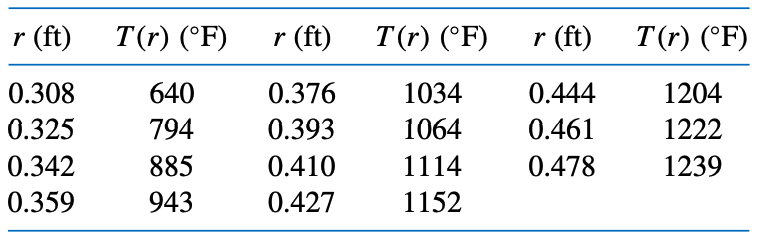

Vamos utilizar abaixo uma versão adaptada do método de Simpson Composto, pois não possuímos uma fórmula explícita da função $T(r)$. 

In [114]:
# Dados de entrada
x = np.array([0.308, 0.325, 0.342, 0.359, 0.376, 0.393, 0.410, 0.427, 0.444, 0.461, 0.478])
y = np.array([640, 794, 885, 943, 1034, 1064, 1114, 1152, 1204, 1222, 1239])
n = len(x)-1

theta_p = 0.7051
r = 0.478

re = 0.308
r0 = 0.478

In [115]:
# Adaptação para receber tabelas como entrada

def composite_simpson_adaptation(x, y, n):

    h = (x[-1] - x[0])/n # equivalente a (b-a)/h

    XI0 = y[0] + y[-1] # equivalente ao f(a) + f(b)
    XI1 = 0
    XI2 = 0

    for i in range(1,n):

        if i%2 == 0:
            XI2 += y[i] # equivalente a f(x)
        else:
            XI1 += y[i]

    XI = (h/3)*(XI0 + 2*XI2 + 4*XI1)

    return XI

Vamos calcular primeiramente a integral do numerador da expressão de $T$.

In [116]:
integral_numerador = composite_simpson_adaptation(x,y,n)

Observe que precisamos multiplicar o resultado pelo fator constante $r_0θ_p$ que aparece na integral do numerador. Portanto, temos:     

In [117]:
fator = r0*theta_p
integral_numerador = integral_numerador * fator

Vamos agora calcular a integral do denominador

In [118]:
denominador = lambda x: r0*theta_p
integral_denominador = composite_simpson(denominador, re, r0, 1000)

Agora obtemos o resultado final fazendo o quociente. Portanto, $T$ será igual a:    

In [119]:
T = integral_numerador/integral_denominador
T

1035.100000000003

Portanto, a temperatura média da área de revestimento dos discos de freio é aproximadamente igual a (ºF) 1035,1. 

## Análise Geral dos Resultados

Com esta adaptação do método de Simpson Composto mostramos que ainda que não conheçamos a fórmula explícita da função podemos, a partir de dados experimentais, obter a aproximação do cálculo da integral desejada. 